<a href="https://colab.research.google.com/github/arkajyotimitra/mini_projects/blob/main/ae_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class DummyDataset(Dataset):
    def __init__(self, num_samples, image_size):
        self.num_samples = num_samples
        self.image_size = image_size

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Generate random noise image
        image = torch.rand((1, self.image_size, self.image_size))
        return image

# Create dummy dataset
num_samples = 1000
image_size = 28
dataset = DummyDataset(num_samples, image_size)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [2]:
import torch.nn as nn

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # 28x28x1 -> 28x28x16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28x16 -> 14x14x16
        )
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14x16 -> 28x28x1
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model
model = ConvAutoencoder()


In [16]:
import torch.optim as optim
import random
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs = data
        # labels = random.shuffle(data)
        # print(inputs.shape, labels.shape)
        rand_idx = torch.randperm(inputs.shape[0])
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, inputs[rand_idx])
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(dataloader)}], Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


Finished Training


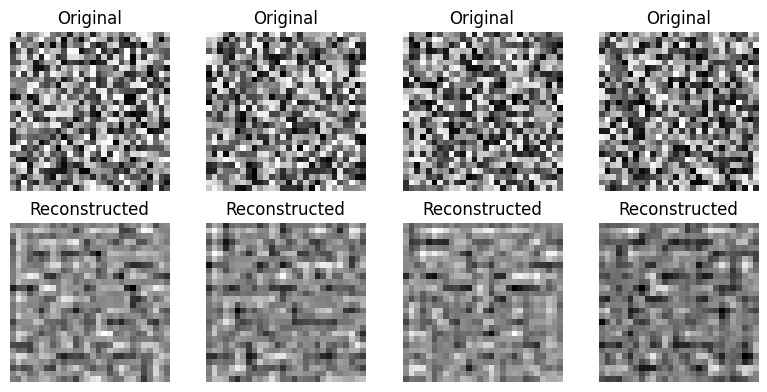

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data
dataiter = iter(dataloader)
images = next(dataiter)

# Reconstruct images using the trained model
outputs = model(images)
outputs = outputs.detach().numpy()

# Plot original images and reconstructed images
plt.figure(figsize=(8, 4))
for i in range(4):
    # Original
    plt.subplot(2, 4, i + 1)
    plt.imshow(np.squeeze(images[i]), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, 4, i + 5)
    plt.imshow(np.squeeze(outputs[i]), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 145880200.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 20372636.03it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 1648877/1648877 [00:00<00:00, 47549873.81it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2886006.48it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [17]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, _ = data
        rand_idx = torch.randperm(inputs.shape[0]) # shuffling the image index
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, inputs[rand_idx]) # comparing with random images in the batch
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


Epoch [1/10], Batch [100/1875], Loss: 0.08578189939260483
Epoch [1/10], Batch [200/1875], Loss: 0.0831203594058752
Epoch [1/10], Batch [300/1875], Loss: 0.0830287442356348
Epoch [1/10], Batch [400/1875], Loss: 0.08194132432341576
Epoch [1/10], Batch [500/1875], Loss: 0.08225908622145653
Epoch [1/10], Batch [600/1875], Loss: 0.08188136257231235
Epoch [1/10], Batch [700/1875], Loss: 0.08144336409866809
Epoch [1/10], Batch [800/1875], Loss: 0.08086749650537968
Epoch [1/10], Batch [900/1875], Loss: 0.08084764972329139
Epoch [1/10], Batch [1000/1875], Loss: 0.0803123301267624
Epoch [1/10], Batch [1100/1875], Loss: 0.07979750342667102
Epoch [1/10], Batch [1200/1875], Loss: 0.08070230208337308
Epoch [1/10], Batch [1300/1875], Loss: 0.08047864474356174
Epoch [1/10], Batch [1400/1875], Loss: 0.07972910575568676
Epoch [1/10], Batch [1500/1875], Loss: 0.08078464984893799
Epoch [1/10], Batch [1600/1875], Loss: 0.08021843887865543
Epoch [1/10], Batch [1700/1875], Loss: 0.07974239446222782
Epoch [1/

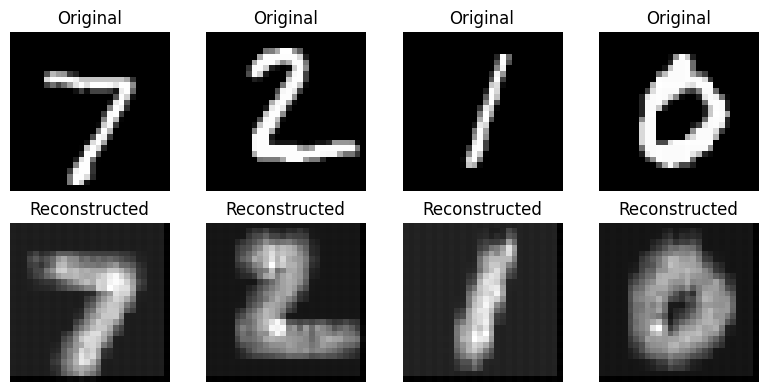

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data
dataiter = iter(test_loader)
images, _ = next(dataiter)

# Reconstruct images using the trained model
outputs = model(images)
outputs = outputs.detach().numpy()

# Plot original images and reconstructed images
plt.figure(figsize=(8, 4))
for i in range(4):
    # Original
    plt.subplot(2, 4, i + 1)
    plt.imshow(np.squeeze(images[i]), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, 4, i + 5)
    plt.imshow(np.squeeze(outputs[i]), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()
